In [ ]:
#importing libraries

In [3]:
import numpy as np
import pandas as pd

In [20]:
data=pd.read_csv('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\nlp\\fake_news\\kaggle_fake_train.csv')

In [21]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
data.shape

(20800, 5)

In [23]:
data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [24]:
data=data.drop('id',axis=1)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

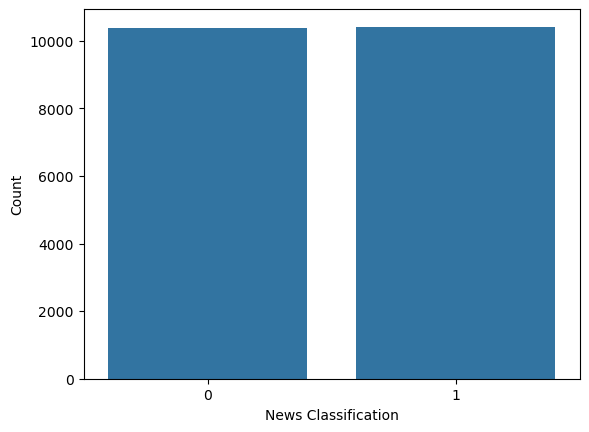

In [26]:
sns.countplot(x=data['label'], data=data)
plt.xlabel('News Classification')
plt.ylabel('Count')

In [27]:
data.isnull()

,title,author,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20795,False,False,False,False
20796,False,False,False,False
20797,False,False,False,False
20798,False,False,False,False


In [28]:
data=data.dropna()

In [ ]:
#preprocessing

In [30]:
import re
def remove_html_tags(text):
    html_pattern = r'<.*?>'
    without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
    return without_html

data["text"] = data["text"].apply(lambda x: remove_html_tags(x))

data.head()


,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [31]:
#convert lower
def convert_to_lower(text):
    return text.lower()

data["text"] = data["text"].apply(lambda x: convert_to_lower(x))

data.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide: we didn’t even see comey’s let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"why the truth might get you fired october 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print \nan iranian woman has been sentenced to...,1


In [34]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data["text"] = data["text"].apply(lambda x: remove_punctuation(x))
data.head()

,title,author,text,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,Darrell Lucus,house dem aide we didn’t even see comey’s lett...,1
1,FLYNN Hillary Clinton Big Woman on Campus Bre...,Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october 29 2...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print \nan iranian woman has been sentenced to...,1


In [35]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

data["text"] = data["text"].apply(lambda x: remove_extra_white_spaces(x))
data.head()

,title,author,text,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,Darrell Lucus,house dem aide we didn’t even see comey’s lett...,1
1,FLYNN Hillary Clinton Big Woman on Campus Bre...,Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october 29 2...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print \nan iranian woman has been sentenced to...,1


In [54]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download("stopwords")

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

data["text"] = data["text"].apply(lambda x: remove_stopwords(x))

data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,author,text,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,Darrell Lucus,house dem aide ’ even see comey ’ letter jason...,1
1,FLYNN Hillary Clinton Big Woman on Campus Bre...,Daniel J. Flynn,ever get feeling life circle roundabout rather...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,video 15 civilian killed single u airstrike id...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced six year prison ...,1


In [55]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

nltk.download("wordnet")

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

data["text"] = data["text"].apply(lambda x: lemmatizing(x))

data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,author,text,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,Darrell Lucus,house dem aide ’ even see comey ’ letter jason...,1
1,FLYNN Hillary Clinton Big Woman on Campus Bre...,Daniel J. Flynn,ever get feeling life circle roundabout rather...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,truth might get fired october 29 2016 tension ...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,video 15 civilian killed single u airstrike id...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print iranian woman sentenced six year prison ...,1


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(data['text']).toarray()

In [57]:
y = data['label']

In [58]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [59]:
#training model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [60]:
#test model
y_pred = classifier.predict(X_test)

In [61]:
#evalute model
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


---- Scores ----
Accuracy score is: 89.91%
Precision score is: 0.91
Recall score is: 0.86


In [62]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [63]:
cm

array([[1894,  146],
       [ 223, 1394]], dtype=int64)

In [ ]:
#plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()